In [4]:


import pandas as pd
import collections
import matplotlib.pyplot as plt

df=pd.read_csv('../data/preprocessed/Final_uwe.csv')
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
#Preprocessing
for i,row in df.iterrows():
    if row['Course'].startswith('CCC'):
        df.drop(i,inplace=True)


for i,row in df.iterrows():
    if row['Grade']=='AF' or row['Grade']=='R':
        df.drop(i,inplace=True)

<ipython-input-6-1b26d2322478>:151: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 3))


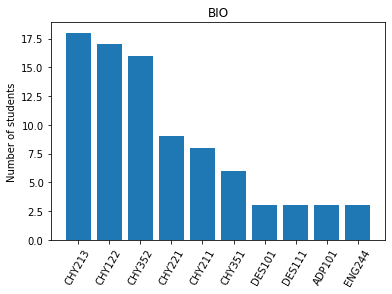

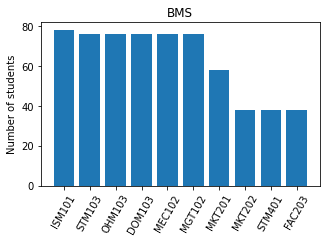

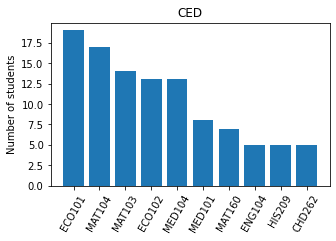

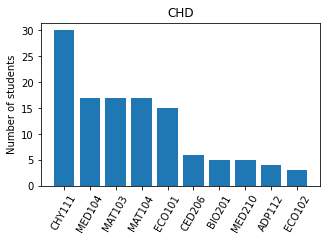

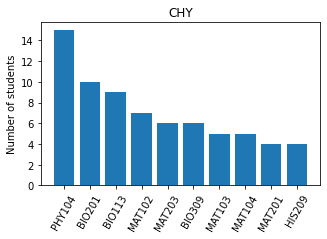

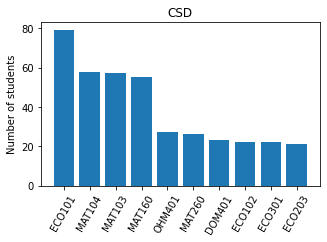

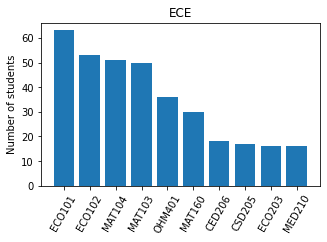

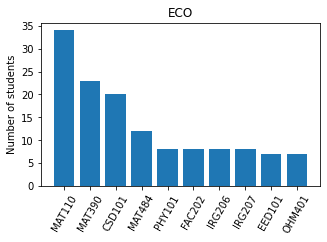

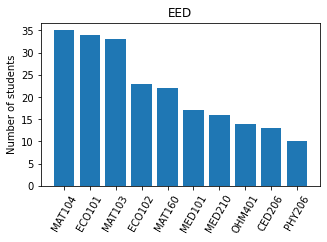

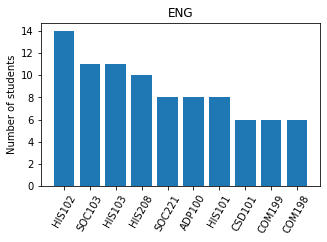

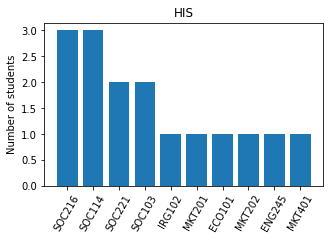

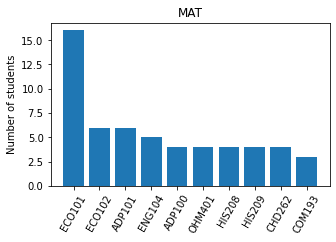

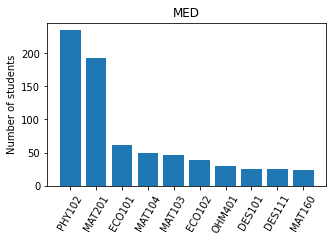

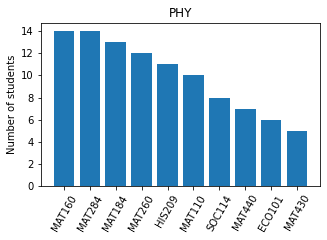

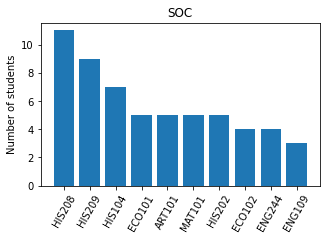

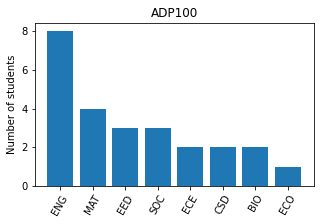

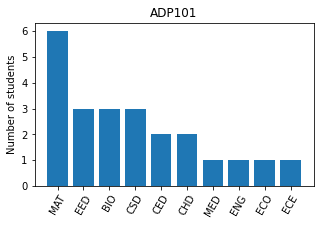

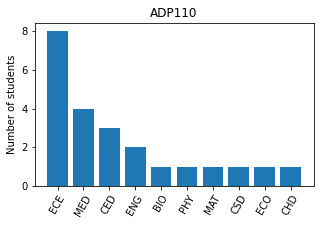

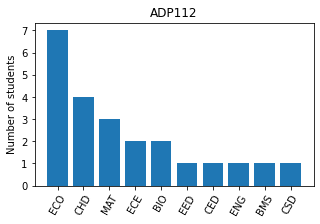

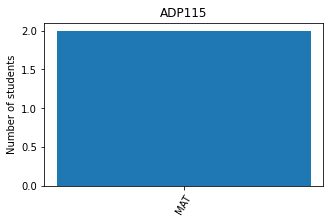

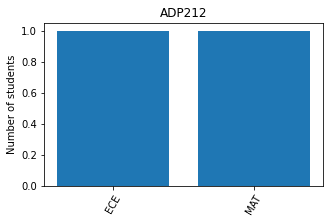

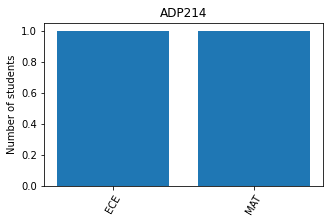

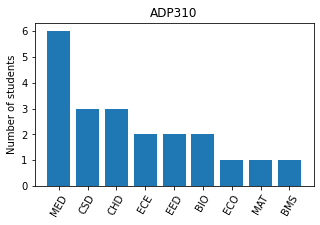

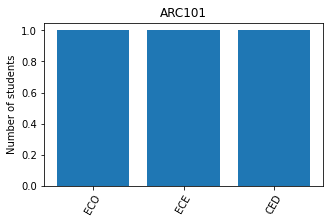

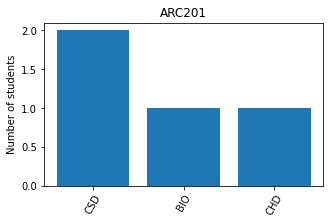

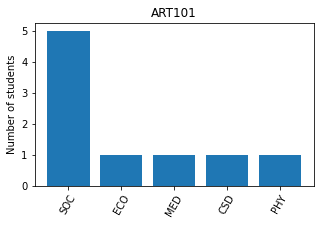

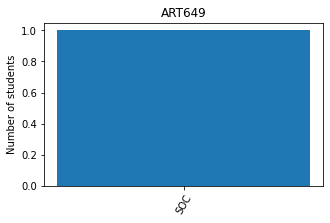

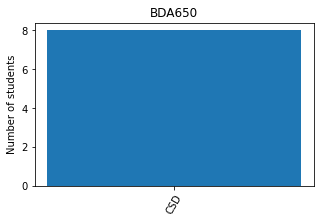

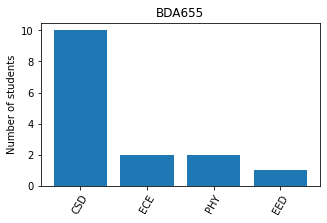

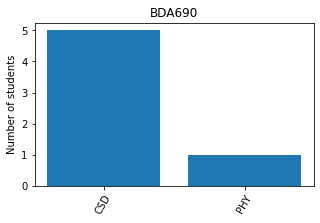

<Figure size 360x216 with 0 Axes>

In [6]:
#Creating the dictionary from the most frequent grades entered as list.
def f(l):
    d=dict() 
    for i in l: 
        d[i[0]] = i[1] 
    return d 

def avgGrade(d):
    listOfGrades = ["A","A-","B","B-","C","C-","D"]
    gradesVal = range(10,3,-1)
    MappedGrades = dict()
    for i in range(len(listOfGrades)):
        MappedGrades[listOfGrades[i]] = gradesVal[i]
    MappedGrades["F"]=0
    MappedGrades["W"] = 6
    MappedGrades["AP"] = 10
    
    s=0
    for key,val in d.items():
        s+= MappedGrades[key]*val
    return s/sum(d.values())


df['Course'].unique()
df['Course'].nunique()
df['Grade'].unique()

df.drop(['Sem_year'],inplace=True,axis=1)

course_grades=df.groupby('Course')['Grade'].apply(list).to_dict()

uwe_grades=pd.DataFrame(list(course_grades.items()))
uwe_grades=uwe_grades.rename( columns={0: "Course", 1: "Grade"})


uwe_grades['grades_dict']=""
uwe_grades['5_largest']=''
uwe_grades['total_students']=''
uwe_grades['avg_grade']=''

for i,row in uwe_grades.iterrows():
    uwe_grades.loc[i][2]=collections.Counter(uwe_grades.loc[i][1])
    
for i,row in uwe_grades.iterrows():
    uwe_grades.loc[i][3]=f(collections.Counter(uwe_grades.loc[i][2]).most_common(5))

length_course_grades = {key: len(value) for key, value in course_grades.items()}
total_student_list=list(length_course_grades.values())

uwe_grades['total_students']=total_student_list

for i,row in uwe_grades.iterrows():
    if row['total_students']<=5:
        uwe_grades.drop(i,inplace=True)
        
avgGradesList = []
for i,row in uwe_grades.iterrows():
    avgGradesList.append(avgGrade(uwe_grades.loc[i]["5_largest"]))

#appending the avgGrades as columns
uwe_grades["avg_grade"] = avgGradesList


# print('9-10')
AminustoA=[]
for i,row in uwe_grades.iterrows():
    if row['avg_grade']>=9:
        # print(row['Course'])
        AminustoA.append(row['Course'])
# print('8-9')        
BtoAminus=[]
for i,row in uwe_grades.iterrows():
    if row['avg_grade']>=8 and row['avg_grade']<9:
        # print(row['Course'])
        BtoAminus.append(row['Course'])
# print('7-8')  
BminustoB=[]      
for i,row in uwe_grades.iterrows():
    if row['avg_grade']>=7 and row['avg_grade']<8:
        # print(row['Course'])
        BminustoB.append(row['Course'])
# print('6-7')        
CtoBminus=[]
for i,row in uwe_grades.iterrows():
    if row['avg_grade']>=6 and row['avg_grade']<7:
        # print(row['Course'])
        CtoBminus.append(row['Course'])
# print('<6')     
Below_C=[]   
for i,row in uwe_grades.iterrows():
    if row['avg_grade']<6:
        # print(row['Course'])
        Below_C.append(row['Course'])

#-------------------------------------------------------------

course_dept=df.groupby('Major')['Course'].apply(list).to_dict()


#dept wise analysis1
   
uwe_dept=pd.DataFrame(list(course_dept.items()))
uwe_dept=uwe_dept.rename( columns={0: "Major", 1: "Course"})
uwe_dept['dept_dict']=''
uwe_dept['10_largest']=''

for i,row in uwe_dept.iterrows():
    uwe_dept.loc[i][2]=collections.Counter(uwe_dept.loc[i][1])
    
   
    
for i,row in uwe_dept.iterrows():
    uwe_dept.loc[i][3]=f(collections.Counter(uwe_dept.loc[i][2]).most_common(10))


#Major dept wise analysis of uwes's 
#for i,row in uwe_dept.iterrows(10):
uwe_df=uwe_dept.head(15)
for i,row in uwe_df.iterrows():
    plt.ylabel('Number of students')
    plt.title(uwe_dept['Major'].iloc[i])
    plt.bar(range(len(uwe_dept['10_largest'].iloc[i])), list(uwe_dept['10_largest'].iloc[i].values()), align='center')
    plt.xticks(range(len(uwe_dept['10_largest'].iloc[i])), list(uwe_dept['10_largest'].iloc[i].keys()),rotation=60)
    plt.figure(figsize=(5, 3))

# UWE wise find the Major backgrounds of students who opt that UWE

course_dept2=df.groupby('Course')['Major'].apply(list).to_dict()

uwe_dept2=pd.DataFrame(list(course_dept2.items()))
uwe_dept2=uwe_dept2.rename( columns={0: "Major", 1: "Course"})
uwe_dept2['dept_dict']=''
uwe_dept2['10_largest']=''

for i,row in uwe_dept2.iterrows():
    uwe_dept2.loc[i][2]=collections.Counter(uwe_dept2.loc[i][1])
    
   
    
for i,row in uwe_dept2.iterrows():
    uwe_dept2.loc[i][3]=f(collections.Counter(uwe_dept2.loc[i][2]).most_common(10))



uwe_df2=uwe_dept2.head(15)
for i,row in uwe_df2.iterrows():
    plt.ylabel('Number of students')
    plt.title(uwe_dept2['Major'].iloc[i])
    plt.bar(range(len(uwe_dept2['10_largest'].iloc[i])), list(uwe_dept2['10_largest'].iloc[i].values()), align='center')
    plt.xticks(range(len(uwe_dept2['10_largest'].iloc[i])), list(uwe_dept2['10_largest'].iloc[i].keys()),rotation=60)
    plt.figure(figsize=(5, 3))


# CONCLUSION

- We wanted to find out from what background, students are likely to opt for UWEs in each department, based on factors like their interests or similarity of background of UWEs with their major course. 
- Like, above we observe that `BDA690` UWE which is a course offered in the department of Big Data Analytics is opted by students belonging from 2 backgrounds: `Computer Science` (majority) and `Physics`, which is quite reasonable also, as students studying `Computer Science` are ore likely to explore the field of `Big Data analytics`
- Also, we have found out, for each Major department, what all UWEs people tend to opt for. For example, the first plot shows that the students who are from `BIO` Major tend to choose UWEs like `CHY213`, `CHY122`, `CHY352`, etc which are all `Chemistry` related courses, which might indicate that they are trying to combine the degree of `Chemistry` and want to pursue it as a `Minor` along with their major `BIO`. such kinds of other patterns can also be mined from other plots above